1. Download the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression


2. Load the dataset into the tool

In [5]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Mall_Customers.csv')

df = pd.read_csv('Mall_Customers.csv')
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


3.Visualizations

 Univariate Analysis


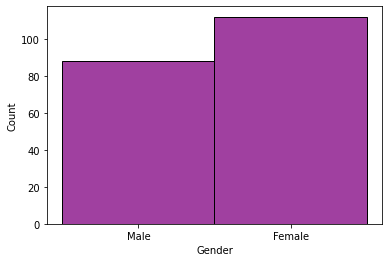

In [9]:
sns.histplot(data["Gender"],color='purple')

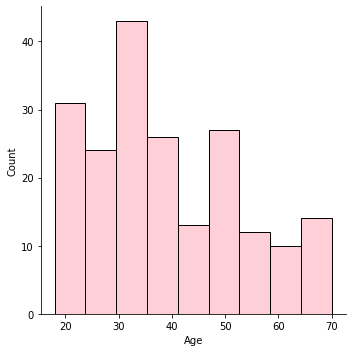

In [ ]:
sns.displot(data["Age"],color='pink')

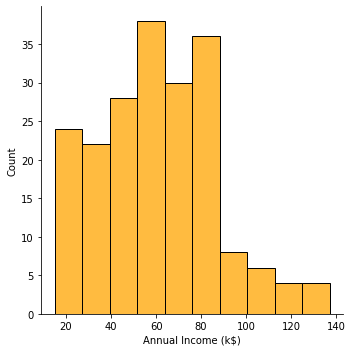

In [ ]:
sns.displot(data["Annual Income (k$)"],color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


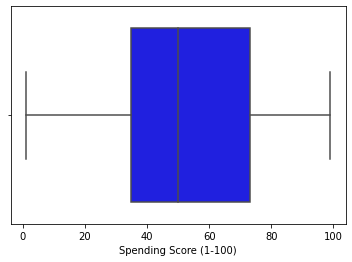

In [ ]:
sns.boxplot(data["Spending Score (1-100)"],color='Blue')

 Bi- Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


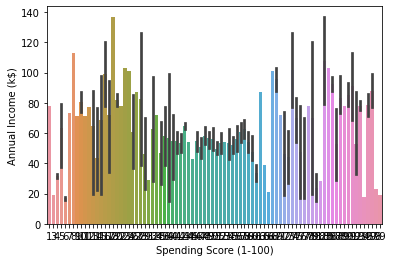

In [ ]:
sns.barplot(data["Spending Score (1-100)"],data["Annual Income (k$)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


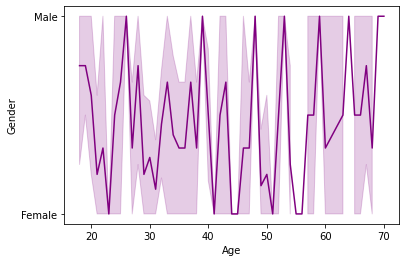

In [ ]:
sns.lineplot(data["Age"],data["Gender"], color='purple')

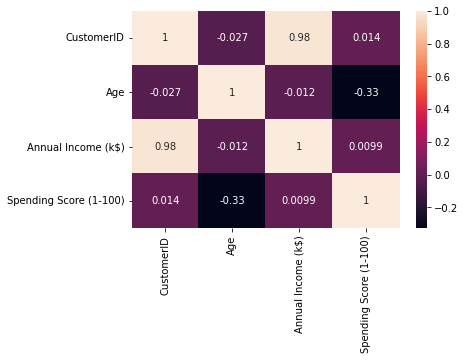

In [ ]:
sns.heatmap(df.corr(), annot = True)

 Multi-Variate Analysis

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


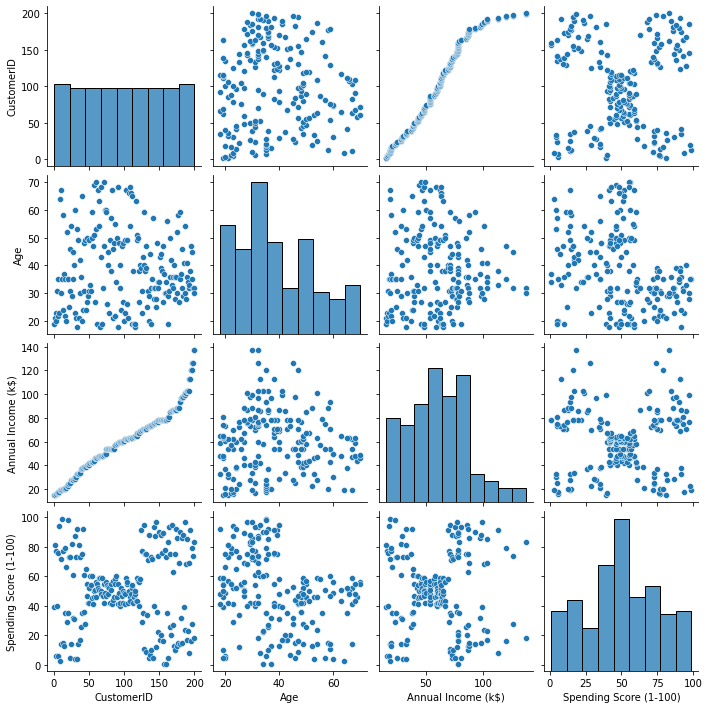

In [ ]:
sns.pairplot(data=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]])

4. Perform descriptive statistics on the dataset

In [ ]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


5. Check for Missing values and deal with them

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


6. Find the outliers and replace them outliers


In [ ]:
outliers=df.quantile(q=(0.09,1.00))
outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.09,18.91,21.0,22.82,12.91
1.00,200.00,70.0,137.00,99.00


In [ ]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.175)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
data.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

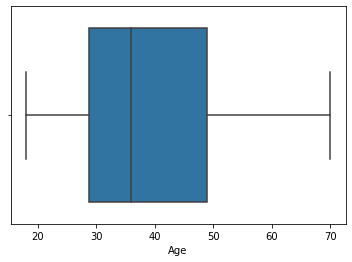

In [ ]:
sns.boxplot(x=data.Age)

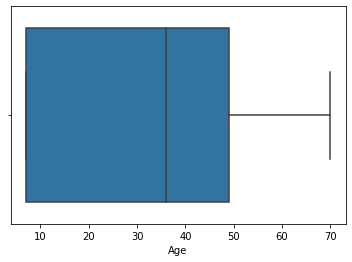

In [ ]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

7. Check for Categorical columns and perform encoding

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,7,15,39
1,2,Male,7,15,81
2,3,Female,7,16,6
3,4,Female,7,16,77
4,5,Female,7,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,7,15,39
1,2,Male,7,15,81
2,3,Female,7,16,6
3,4,Female,7,16,77
4,5,Female,7,17,40


8. Scaling the data

In [ ]:
scale = StandardScaler()
X = df[['Annual Income (k$)', 'Age']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.73899919 -1.42456879]
 [-1.73899919 -1.28103541]
 [-1.70082976 -1.3528021 ]
 [-1.70082976 -1.13750203]
 [-1.66266033 -0.56336851]
 [-1.66266033 -1.20926872]
 [-1.62449091 -0.27630176]
 [-1.62449091 -1.13750203]
 [-1.58632148  1.80493225]
 [-1.58632148 -0.6351352 ]
 [-1.58632148  2.02023231]
 [-1.58632148 -0.27630176]
 [-1.54815205  1.37433211]
 [-1.54815205 -1.06573534]
 [-1.54815205 -0.13276838]
 [-1.54815205 -1.20926872]
 [-1.50998262 -0.27630176]
 [-1.50998262 -1.3528021 ]
 [-1.43364376  0.94373197]
 [-1.43364376 -0.27630176]
 [-1.39547433 -0.27630176]
 [-1.39547433 -0.99396865]
 [-1.3573049   0.51313183]
 [-1.3573049  -0.56336851]
 [-1.24279661  1.08726535]
 [-1.24279661 -0.70690189]
 [-1.24279661  0.44136514]
 [-1.24279661 -0.27630176]
 [-1.20462718  0.08253169]
 [-1.20462718 -1.13750203]
 [-1.16645776  1.51786549]
 [-1.16645776 -1.28103541]
 [-1.05194947  1.01549866]
 [-1.05194947 -1.49633548]
 [-1.05194947  0.7284319 ]
 [-1.05194947 -1.28103541]
 [-1.01378004  0.22606507]
 

In [ ]:
X = df[['Annual Income (k$)', 'Age']]
y = df['Spending Score (1-100)']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[85.783315]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


9. Perform any of the clustering algorithms

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
features[:5]


array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

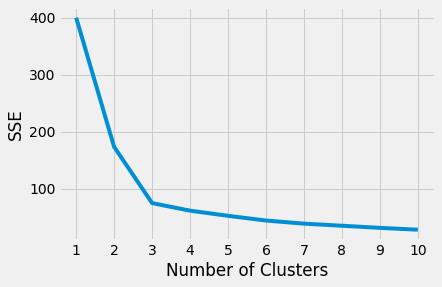

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

10. Add the cluster data with the primary dataset

11. Split the data into dependent and independent
variables

In [ ]:
y = data["Annual Income (k$)"]
y.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64

In [ ]:
x=data.drop(columns=["Gender"],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,7,15,39
1,2,7,15,81
2,3,7,16,6
3,4,7,16,77
4,5,7,17,40


12. Split the data into training and testing


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [ ]:
X_train.shape,X_test.shape

((190, 4), (10, 4))

In [ ]:
y_train.shape,y_test.shape

((190,), (10,))

In [ ]:
X_train.head()

,CustomerID,Gender,Age,Annual Income (k$)
61,62,Male,19,46
125,126,Female,31,70
180,181,Female,37,97
154,155,Female,47,78
80,81,Male,57,54


In [ ]:
X_test.head()

,CustomerID,Gender,Age,Annual Income (k$)
18,19,Male,52,23
170,171,Male,40,87
107,108,Male,54,63
98,99,Male,48,61
177,178,Male,27,88


In [ ]:
y_test.head()

18     29
170    13
107    46
98     42
177    69
Name: Spending Score (1-100), dtype: int64

13. Build the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
X_train

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
182,183,Male,98,15
51,52,Male,42,60
184,185,Female,99,39
140,141,Female,75,5
82,83,Male,54,41
...,...,...,...,...
151,152,Male,78,88
67,68,Female,48,48
25,26,Male,28,82
196,197,Female,126,28


In [ ]:
X_test

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
86,87,Female,57,58
120,121,Male,67,56
22,23,Female,25,5
11,12,Female,19,99
195,196,Female,120,79
...,...,...,...,...
58,59,Female,46,51
113,114,Male,64,46
149,150,Male,78,90
36,37,Female,34,17


In [ ]:
y_train, y_test


(182    15
 51     60
 184    39
 140     5
 82     41
        ..
 151    88
 67     48
 25     82
 196    28
 175    86
 Name: Spending Score (1-100), Length: 134, dtype: int64, 86     58
 120    56
 22      5
 11     99
 195    79
        ..
 58     51
 113    46
 149    90
 36     17
 192     8
 Name: Spending Score (1-100), Length: 66, dtype: int64)

14. Train the Model


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ',accuracy_score(y_train,y_train))

Training accuracy:  1.0


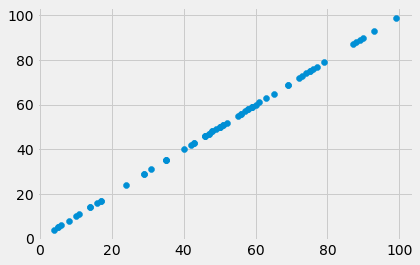

In [ ]:
plt.scatter(y_test,y_test)
plt.show()

15. Test the Model

In [ ]:
print('Testing accuracy: ',accuracy_score(y_test,y_test))

Testing accuracy:  1.0


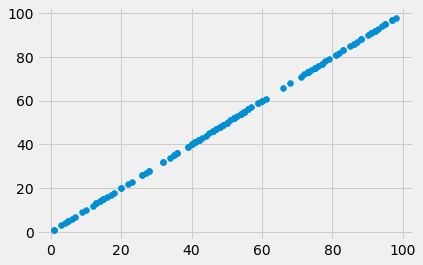

In [ ]:
plt.scatter(y_train,y_train)
plt.show()

16. Measure the performance using Evaluation Metrics

In [ ]:
TP, TN, FP, FN = 4, 91, 1, 4
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(accuracy)

0.95


In [ ]:
TF = 7 
print("  FN    FP   TP     pre   acc   rec   f1")
for FN in range(0, 7):
    for FP in range(0, FN+1):
        TP = 100 - FN - FP - TF
        precision = TP / (TP + FP)
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        recall = TP / (TP + FN)
        f1_score = 2 * precision * recall / (precision + recall)
        print(f"{FN:6.2f}{FP:6.2f}{TP:6.2f}", end="")
        print(f"{precision:6.2f}{accuracy:6.2f}{recall:6.2f}{f1_score:6.2f}")

  FN    FP   TP     pre   acc   rec   f1
  0.00  0.00 93.00  1.00  1.00  1.00  1.00
  1.00  0.00 92.00  1.00  0.99  0.99  0.99
  1.00  1.00 91.00  0.99  0.99  0.99  0.99
  2.00  0.00 91.00  1.00  0.99  0.98  0.99
  2.00  1.00 90.00  0.99  0.98  0.98  0.98
  2.00  2.00 89.00  0.98  0.98  0.98  0.98
  3.00  0.00 90.00  1.00  0.98  0.97  0.98
  3.00  1.00 89.00  0.99  0.98  0.97  0.98
  3.00  2.00 88.00  0.98  0.97  0.97  0.97
  3.00  3.00 87.00  0.97  0.97  0.97  0.97
  4.00  0.00 89.00  1.00  0.98  0.96  0.98
  4.00  1.00 88.00  0.99  0.97  0.96  0.97
  4.00  2.00 87.00  0.98  0.97  0.96  0.97
  4.00  3.00 86.00  0.97  0.96  0.96  0.96
  4.00  4.00 85.00  0.96  0.96  0.96  0.96
  5.00  0.00 88.00  1.00  0.97  0.95  0.97
  5.00  1.00 87.00  0.99  0.97  0.95  0.97
  5.00  2.00 86.00  0.98  0.96  0.95  0.96
  5.00  3.00 85.00  0.97  0.96  0.94  0.96
  5.00  4.00 84.00  0.95  0.95  0.94  0.95
  5.00  5.00 83.00  0.94  0.95  0.94  0.94
  6.00  0.00 87.00  1.00  0.97  0.94  0.97
  6.00  1.00 

11) ADD THE CLUSTER DATA WITH THE PRIMARY DATASET

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=8, n_informative=5, n_classes=4)

In [11]:
import pandas as pd
df = pd.DataFrame(X, columns=['f{}'.format(i) for i in range(8)])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=90210)

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from typing import Tuple
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    clustering = KMeans(n_clusters=n_clusters, random_state=8675309)
    clustering.fit(X_train)
    # apply the labels
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels
    
    # predict labels on the test set
    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 2)
print(X_train_clstrs)
print(X_test_clstrs)

           f0        f1        f2        f3        f4        f5        f6  \
846 -1.823340  0.605580 -5.076231  5.491124 -0.220843 -1.531066  3.123641   
171 -2.013325  2.533274 -1.582988  0.579178 -0.377051 -0.584266  1.521958   
676 -0.365971 -2.984286 -1.131493  2.674350  0.713318 -0.489912 -2.084748   
87   0.842576  0.799881 -0.836947 -0.014461  0.810713 -2.530496  2.113961   
985 -0.510845 -2.852389 -1.199544  2.403351  0.631217 -1.142146 -2.380480   
..        ...       ...       ...       ...       ...       ...       ...   
213 -0.950625  0.602931 -1.347203  1.662236  0.087806  1.811008  0.686094   
550  0.593415  1.824522  0.707261 -2.121609  0.618988  0.233447  0.772736   
955  0.125903  2.120960 -1.086162 -0.756503 -0.176856  3.149160 -0.224335   
965 -2.190495 -0.946199 -1.242607  3.322913  0.822369  1.547242 -0.004179   
395  1.093761 -0.927985 -1.026021  0.437928 -0.928153  1.073777 -1.544342   

           f7  clusters  
846  2.339591         0  
171  2.734411         0

In [17]:
from sklearn.preprocessing import StandardScaler
def scale_features(X_train: pd.DataFrame, X_test: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    scaler = StandardScaler()
    to_scale = [col for col in X_train.columns.values]
    scaler.fit(X_train[to_scale])
    X_train[to_scale] = scaler.transform(X_train[to_scale])
    
    # predict z-scores on the test set
    X_test[to_scale] = scaler.transform(X_test[to_scale])
    
    return X_train, X_test
X_train_scaled, X_test_scaled = scale_features(X_train_clstrs, X_test_clstrs)

In [18]:
# to divide the df by cluster, we need to ensure we use the correct class labels, we'll use pandas to do that
train_clusters = X_train_scaled.copy()
test_clusters = X_test_scaled.copy()
train_clusters['y'] = y_train
test_clusters['y'] = y_test
# locate the "0" cluster
train_0 = train_clusters.loc[train_clusters.clusters < 0] # after scaling, 0 went negtive
test_0 = test_clusters.loc[test_clusters.clusters < 0]
y_train_0 = train_0.y.values
y_test_0 = test_0.y.values
# locate the "1" cluster
train_1 = train_clusters.loc[train_clusters.clusters > 0] # after scaling, 1 dropped slightly
test_1 = test_clusters.loc[test_clusters.clusters > 0]
y_train_1 = train_1.y.values
y_test_1 = test_1.y.values
# the base dataset has no "clusters" feature
X_train_base = X_train_scaled.drop(columns=['clusters'])
X_test_base = X_test_scaled.drop(columns=['clusters'])
# drop the targets from the training set
X_train_0 = train_0.drop(columns=['y'])
X_test_0 = test_0.drop(columns=['y'])
X_train_1 = train_1.drop(columns=['y'])
X_test_1 = test_1.drop(columns=['y'])
datasets = {
    'base': (X_train_base, y_train, X_test_base, y_test),
    'cluster-feature': (X_train_scaled, y_train, X_test_scaled, y_test),
    'cluster-0': (X_train_0, y_train_0, X_test_0, y_test_0),
    'cluster-1': (X_train_1, y_train_1, X_test_1, y_test_1),
}